In [1]:
import h5py
import numpy as np
import pandas as pd 

import fastdtw
import scipy.spatial.distance as sd

from scipy import ndimage 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 
from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering

import matplotlib.pyplot as plt
import seaborn as sns 
plt.rcParams["figure.figsize"] = [16,9]
sns.set_style('whitegrid')

GRID_SIZE = 0.06
LOWER_LAMBDA = 6472.5
UPPER_LAMBDA = 6740
PLOT_MASK = range(1475,1550)

In [2]:
import linmdtw

In [3]:
hf_spec = h5py.File("/home/pravn/Dropbox/Masters/Research Data/resampled_emission_spectra.h5", "r")
hf_grid = h5py.File("/home/pravn/Dropbox/Masters/Research Data/wl_grid.h5", "r")

wl_grid = np.array(hf_grid["wl_grid"])
df = pd.DataFrame(hf_spec["spectra"])

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,4449,4450,4451,4452,4453,4454,4455,4456,4457,4458
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
hf_spec.close()
hf_grid.close()

In [6]:
df_masked = df.loc[:,PLOT_MASK]
df_masked_np = df_masked.to_numpy()

In [33]:
df_masked.to_csv("test.csv",header=None,index=False)

In [39]:
samples_10 = df_masked.iloc[0:10:,]

In [40]:
samples_10.shape

(10, 75)

In [47]:
samples_10.set_option('display.float_format', '{:.2g}'.format)

AttributeError: 'DataFrame' object has no attribute 'set_option'

In [46]:
samples_10.to_csv("test.csv",header=None,index=False)

In [41]:
df_masked.shape

(6977, 75)

In [8]:
df_masked_np

array([[0.7912324 , 0.79911628, 0.7985126 , ..., 0.79986329, 0.83588461,
        0.84283663],
       [1.01678956, 1.03371707, 1.03914097, ..., 1.03687289, 1.03514419,
        1.02727585],
       [1.06841943, 1.06441767, 1.05954256, ..., 1.0777528 , 1.08255897,
        1.07534706],
       ...,
       [0.77445974, 0.79734068, 0.84299583, ..., 0.80371531, 0.81053699,
        0.7972178 ],
       [0.79396047, 0.78979645, 0.74888732, ..., 0.77299214, 0.78101725,
        0.80420843],
       [0.88686549, 0.85203514, 0.88171964, ..., 0.87436063, 0.87511307,
        0.8841142 ]])

In [20]:
def my_linmdtw(spec1, spec2):
    return linmdtw.linmdtw(spec1, spec2)

In [21]:
np.transpose(df_masked_np[0,:])

array([0.7912324 , 0.79911628, 0.7985126 , 0.78993609, 0.77056989,
       0.74783969, 0.75019998, 0.77857941, 0.80555676, 0.81844907,
       0.8160751 , 0.78783837, 0.74603283, 0.72787695, 0.7046962 ,
       0.72780731, 0.72977377, 0.70498727, 0.68357545, 0.66085996,
       0.63400433, 0.6105296 , 0.57750646, 0.55314773, 0.53350943,
       0.51358605, 0.49675954, 0.47245901, 0.44198774, 0.41380269,
       0.38866682, 0.35997789, 0.34310355, 0.35618837, 0.34038492,
       0.33206826, 0.33972165, 0.35406857, 0.37460062, 0.38928882,
       0.40016174, 0.4211682 , 0.44951664, 0.47412105, 0.50324838,
       0.53224308, 0.54871956, 0.57023987, 0.60332159, 0.62453133,
       0.6487256 , 0.67267992, 0.68262066, 0.69688103, 0.71337608,
       0.70967176, 0.73733928, 0.74397774, 0.73547967, 0.74121739,
       0.76124198, 0.77046134, 0.76957756, 0.77913869, 0.79663998,
       0.79890833, 0.78732786, 0.7863788 , 0.79586869, 0.80022939,
       0.78833608, 0.78192301, 0.79986329, 0.83588461, 0.84283

In [22]:
my_linmdtw(np.transpose(df_masked_np[0,:]),np.transpose(df_masked_np[0,:]))

IndexError: tuple index out of range

In [21]:
type([1,2,3])

list

In [29]:
A = np.array([1,2,3])

In [30]:
A

array([1, 2, 3])

In [32]:
B = np.reshape(A, (-1, 2))

ValueError: cannot reshape array of size 3 into shape (2)

In [22]:
test = linmdtw.fastdtw(np.array([1,2,3]),np.array([4,5,6]),radius=5)

IndexError: tuple index out of range

In [11]:
distance_matrix = sd.pdist(df_masked_np, my_linmdtw)

IndexError: tuple index out of range

Text(0.5, 1.0, 'Warped Time Series $Y(t) = X(s(t))$')

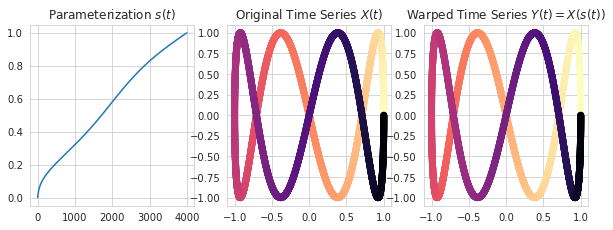

In [23]:
import linmdtw
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Step 1: Create the Lissajous curve
np.random.seed(1)
M = 5000
N = 4000
t1 = np.linspace(0, 1, M)
X = np.zeros((M, 2), dtype=np.float32)
X[:, 0] = np.cos(2*np.pi*t1)
X[:, 1] = np.sin(8*np.pi*t1)

## Step 2: Sample an element from a dictionary of parameterizations
## and use this parameterization to interpolate the original 
## time series
D = linmdtw.alignmenttools.get_parameterization_dict(N)
s = linmdtw.alignmenttools.sample_parameterization_dict(D, 4)
Y = linmdtw.alignmenttools.get_interpolated_euclidean_timeseries(X, s)

## Step 3: Plot the two time series to show the difference
plt.figure(figsize=(10, 10/3))
plt.subplot(131)
plt.plot(s)
plt.title("Parameterization $s(t)$")
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], c = np.arange(M), cmap='magma_r')
plt.title("Original Time Series $X(t)$")
plt.subplot(133)
plt.scatter(Y[:, 0], Y[:, 1], c = np.arange(N), cmap='magma_r')
plt.title("Warped Time Series $Y(t) = X(s(t))$")

In [24]:
print(X)

[[ 1.00000000e+00  0.00000000e+00]
 [ 9.99999225e-01  5.02753258e-03]
 [ 9.99996841e-01  1.00549385e-02]
 ...
 [ 9.99996841e-01 -1.00549385e-02]
 [ 9.99999225e-01 -5.02753258e-03]
 [ 1.00000000e+00 -9.79717482e-16]]


In [25]:
X.shape

(5000, 2)

In [26]:
Y.shape

(4000, 2)

In [25]:
print(Y)

[[ 1.00000000e+00  0.00000000e+00]
 [ 9.99873446e-01  6.35468901e-02]
 [ 9.99521759e-01  1.23371197e-01]
 ...
 [ 9.99997968e-01 -7.67745730e-03]
 [ 9.99999408e-01 -3.83850917e-03]
 [ 1.00000000e+00 -9.79717482e-16]]


In [26]:
type(X)

numpy.ndarray

In [ ]:
X[:, 0] = np.array([1,2,3])
X[:, 1] = np.array([1,2,3])

In [28]:
x = np.arange(4).reshape((1,2))

ValueError: cannot reshape array of size 4 into shape (1,2)